# Cuisine Classification

In [17]:
# Step 1: Import necessary libraries
import pandas as pd  # For data loading and manipulation
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # To encode categorical variables
from sklearn.ensemble import RandomForestClassifier  # Random Forest classification model
from sklearn.metrics import classification_report, accuracy_score  # To evaluate the model

### Data Preprocessing

In [2]:
# Step 2: Load the dataset
file_path = '../Dataset.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(data.head())

# Check the columns in the dataset
print("\nColumns in the dataset:")
print(data.columns)

# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())

First five rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas

### Check missing values

In [3]:
# Check for missing values
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


### Fill the missing values

In [4]:
# Fill missing categorical values with the mode
data['Cuisines'] = data['Cuisines'].fillna(data['Cuisines'].mode()[0])

In [5]:
# Confirm that there are no missing values
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


### Feature Encoding

In [6]:
# Step 3.2: Encode categorical variables
# Encode the target variable (Cuisines) into numerical labels
label_encoder = LabelEncoder()
data['Cuisines_encoded'] = label_encoder.fit_transform(data['Cuisines'])

In [7]:
# Display the mapping of cuisine categories to numbers
print("\nMapping of Cuisines to Encoded Labels:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Mapping of Cuisines to Encoded Labels:
{'Afghani': np.int64(0), 'Afghani, Mughlai, Chinese': np.int64(1), 'Afghani, North Indian': np.int64(2), 'Afghani, North Indian, Pakistani, Arabian': np.int64(3), 'African': np.int64(4), 'African, Portuguese': np.int64(5), 'American': np.int64(6), 'American, Asian, Burger': np.int64(7), 'American, Asian, European, Seafood': np.int64(8), 'American, Asian, Italian, Seafood': np.int64(9), 'American, Asian, North Indian, Mexican, South Indian': np.int64(10), 'American, BBQ': np.int64(11), 'American, BBQ, Burger': np.int64(12), 'American, BBQ, Sandwich': np.int64(13), 'American, BBQ, Seafood': np.int64(14), 'American, BBQ, Southern': np.int64(15), 'American, BBQ, Steak': np.int64(16), 'American, Bakery, European, Burger, Fusion': np.int64(17), 'American, Bar Food': np.int64(18), 'American, Bar Food, BBQ': np.int64(19), 'American, Bar Food, Sandwich': np.int64(20), 'American, Breakfast': np.int64(21), 'American, Breakfast, Burger': np.int64(22), 'Ameri

### Feature & Target Selection

In [8]:
# Step 3.3: Select features and target variable
# Features: Restaurant attributes (e.g., Aggregate rating, Price range, Votes)
# Target: Cuisines_encoded
X = data[['Aggregate rating', 'Price range', 'Votes']]
y = data['Cuisines_encoded']

### Data Preparation for Training

In [9]:
# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nNumber of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])


Number of training samples: 7640
Number of testing samples: 1911


### Train Random Forest Classifier

In [18]:
# Step 5: Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)  # Create the model
classifier.fit(X_train, y_train)  # Train the model on the training data

print("\nRandom Forest Classifier trained successfully!")


Random Forest Classifier trained successfully!


### Evaluate the Model

In [20]:
# Step 6: Evaluate the model
y_pred = classifier.predict(X_test)  # Predict on the test set

# Print classification metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.07901622187336473


### Analyze Model Performance


Class distribution in training data (encoded labels):
Cuisines_encoded
1306    741
1329    409
497     293
1514    288
828     286
       ... 
333       1
74        1
489       1
455       1
609       1
Name: count, Length: 1540, dtype: int64


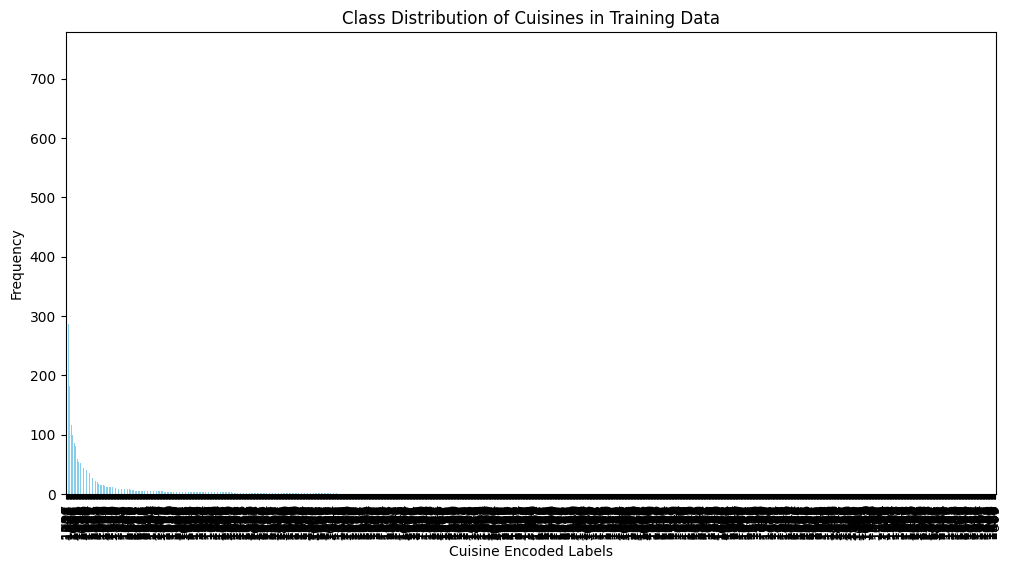

In [21]:
# Analyze model performance
# Check for class imbalance in the training data
class_counts = y_train.value_counts()

print("\nClass distribution in training data (encoded labels):")
print(class_counts)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Cuisines in Training Data')
plt.xlabel('Cuisine Encoded Labels')
plt.ylabel('Frequency')
plt.show()